Task 1:

In [ ]:
pip install tensorflow

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_path = 'data/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_path = 'data/train'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print(len(train_generator))

In [ ]:
print(len(train_generator))

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
num_classes = 3
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
num_classes = 3
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 1386 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/2


C:\Users\User\PycharmProjects\ClassifyWasteProductsUsingTransfer Learning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8009 - loss: 0.6827 - val_accuracy: 0.9667 - val_loss: 0.0781
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9315 - loss: 0.1601 - val_accuracy: 0.9933 - val_loss: 0.0266


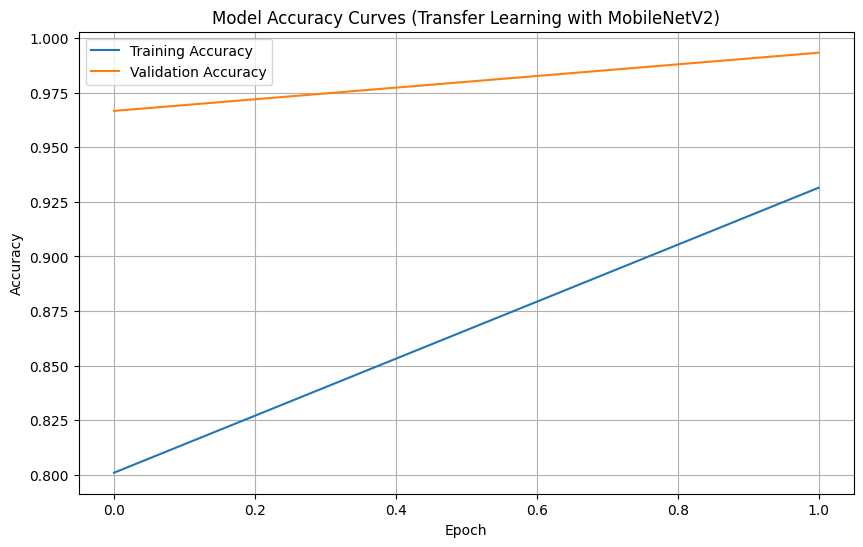

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_data_path = 'data/train'
test_data_path = 'data/test'
IMAGE_SIZE = (96, 96)
BATCH_SIZE = 8
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
num_classes = len(train_generator.class_indices)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
)
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
extract_feat_model = Model(inputs=base_model.input, outputs=predictions)
extract_feat_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = extract_feat_model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curves (Transfer Learning with MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Found 1386 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8001 - loss: 0.7961 - val_accuracy: 0.9667 - val_loss: 0.1360
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9488 - loss: 0.1382 - val_accuracy: 0.9867 - val_loss: 0.0417
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8788 - loss: 0.4043 - val_accuracy: 0.9733 - val_loss: 0.0608
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9055 - loss: 0.2757 - val_accuracy: 0.9800 - val_loss: 0.0553


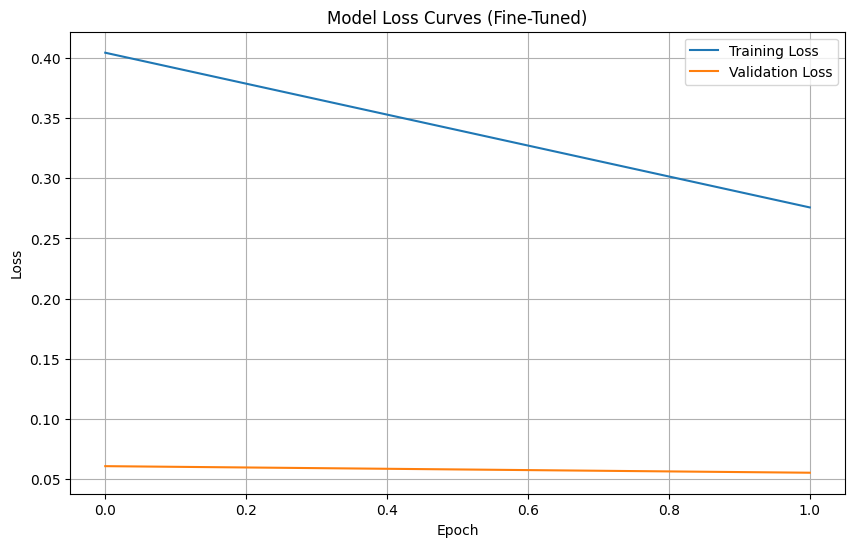

In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
train_data_path = 'data/train'
test_data_path = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical'
)
num_classes = len(train_generator.class_indices)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
extract_feat_model = Model(inputs=base_model.input, outputs=predictions)
extract_feat_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
_ = extract_feat_model.fit(train_generator, epochs=2, validation_data=test_generator)
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False
extract_feat_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_fine_tune = extract_feat_model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)
plt.figure(figsize=(10, 6))
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curves (Fine-Tuned)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Found 1386 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8023 - loss: 1.0334 - val_accuracy: 0.8933 - val_loss: 0.2293
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9358 - loss: 0.1761 - val_accuracy: 0.9800 - val_loss: 0.0354
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8420 - loss: 0.6202 - val_accuracy: 0.9867 - val_loss: 0.0322
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8983 - loss: 0.3321 - val_accuracy: 0.9933 - val_loss: 0.0242


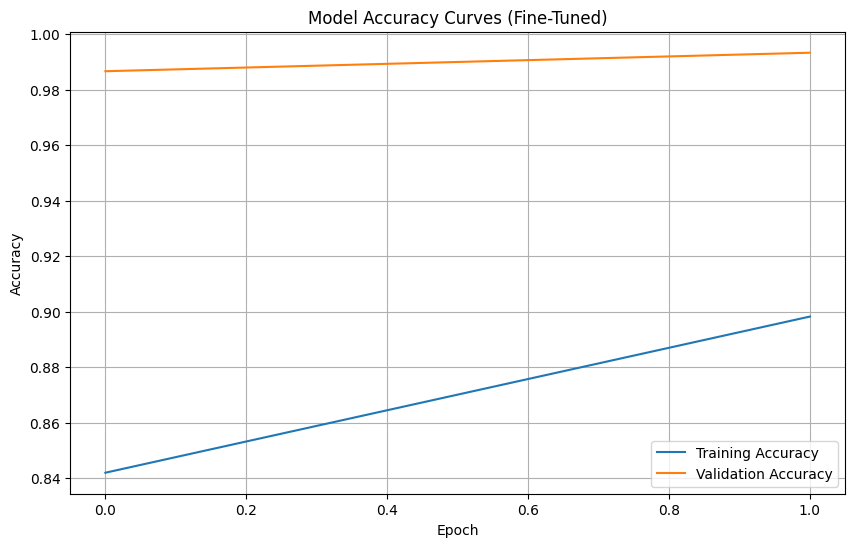

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_data_path = 'data/train'
test_data_path = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical'
)
num_classes = len(train_generator.class_indices)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
extract_feat_model = Model(inputs=base_model.input, outputs=predictions)
extract_feat_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
_ = extract_feat_model.fit(train_generator, epochs=2, validation_data=test_generator)

base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False
extract_feat_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history_fine_tune = extract_feat_model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)
plt.figure(figsize=(10, 6))
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curves (Fine-Tuned)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Found 1386 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7951 - loss: 0.8744 - val_accuracy: 0.9533 - val_loss: 0.1200
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9416 - loss: 0.1436 - val_accuracy: 1.0000 - val_loss: 0.0146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


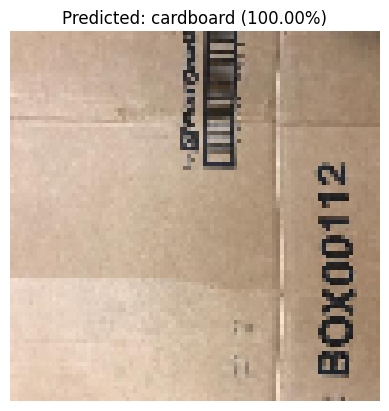

Predicted class for image at index 1 is: cardboard


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
path = "path/to/your/downloaded/dataset"
train_data_path = 'data/train'
test_data_path = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)
num_classes = len(train_generator.class_indices)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
extract_feat_model = Model(inputs=base_model.input, outputs=predictions)
extract_feat_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
_ = extract_feat_model.fit(train_generator, epochs=2, validation_data=test_generator)
test_image_paths = test_generator.filepaths

class_labels = list(test_generator.class_indices.keys())
index_to_plot = 1

img_path = test_image_paths[index_to_plot]
img = image.load_img(img_path, target_size=(96, 96))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = extract_feat_model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_label = class_labels[predicted_class_index]
confidence = prediction[0][predicted_class_index] * 100
plt.imshow(img)
plt.title(f'Predicted: {predicted_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

print(f"Predicted class for image at index {index_to_plot} is: {predicted_label}")

Found 1386 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7987 - loss: 0.8743 - val_accuracy: 0.9333 - val_loss: 0.1130
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9452 - loss: 0.1315 - val_accuracy: 0.9667 - val_loss: 0.0756
Epoch 1/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8268 - loss: 0.8155 - val_accuracy: 0.9933 - val_loss: 0.0184
Epoch 2/2
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8810 - loss: 0.3778 - val_accuracy: 0.9933 - val_loss: 0.0224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


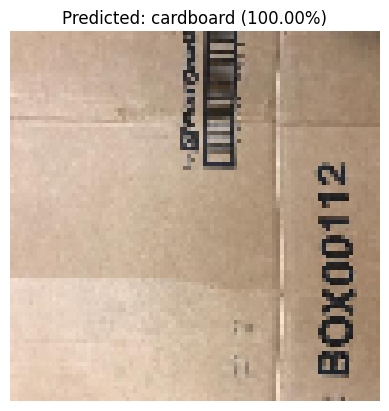

Predicted class for image at index 1 is: cardboard


In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
train_data_path = 'data/train'
test_data_path = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(96, 96),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)
num_classes = len(train_generator.class_indices)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=predictions)
fine_tune_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
_ = fine_tune_model.fit(train_generator, epochs=2, validation_data=test_generator)
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

fine_tune_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
fine_tune_model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)
test_image_paths = test_generator.filepaths
class_labels = list(test_generator.class_indices.keys())
index_to_plot = 1
img_path = test_image_paths[index_to_plot]
img = image.load_img(img_path, target_size=(96, 96))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = fine_tune_model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_label = class_labels[predicted_class_index]
confidence = prediction[0][predicted_class_index] * 100
plt.imshow(img)
plt.title(f'Predicted: {predicted_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

print(f"Predicted class for image at index {index_to_plot} is: {predicted_label}")